In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
path = "./../MICS6_2019_Stats Day Competition/Datasets/mn_Males_15_to_49_Stat_Day.xlsx"
men_dataset = pd.read_excel(path)
path_2 = "./../MICS6_2019_Stats Day Competition/Datasets/hh_Household_Stat_Day.xlsx"
household_dataset = pd.read_excel(path_2)

In [3]:
# HH2 - Household number
# HH7 - Region
# HH6 - Area
hh_extract = household_dataset[["HH1", "HH2", "HH7", "HH6"]]
hh_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HH1     8285 non-null   int64
 1   HH2     8285 non-null   int64
 2   HH7     8285 non-null   int64
 3   HH6     8285 non-null   int64
dtypes: int64(4)
memory usage: 259.0 KB


In [4]:
# HH1 - cluster number
# HH2  - Household number
# MWB4  - Age of man
# MWB5  - Ever attended school
# MWB6A - Highest level of school attended
# MWB14 - Can read part of sentence
# mwelevel
m_extract = men_dataset[["HH1", "HH2",
                         "MWB4", "MWB5", "MWB6A", "MWB14", "mwelevel"]]
# temp = dataset[selected_columns]
# df_0 = temp[temp["helevel"].notna() &
#            temp["HHSEX"].notna()]
# temp.info()
# df_0.info()
# df_0 = df_0[df_0["helevel"] != 9]
m_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HH1       2916 non-null   int64  
 1   HH2       2916 non-null   int64  
 2   MWB4      2214 non-null   float64
 3   MWB5      2214 non-null   float64
 4   MWB6A     2174 non-null   float64
 5   MWB14     370 non-null    float64
 6   mwelevel  2214 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 159.6 KB


In [5]:
# HH1 - cluster_number
# HH2 - household_number
def get_region_and_area(cluster_number, household_number):
    temp = hh_extract[(hh_extract["HH1"] == cluster_number) &
                      (hh_extract["HH2"] == household_number)]
    return temp[["HH7", "HH6"]]


t = m_extract.apply(lambda x: get_region_and_area(
    x["HH1"], x["HH2"])[["HH7", "HH6"]].values[0], axis=1)

In [6]:
a = pd.Series.to_frame(t)
m_extract["HH7"] = a.apply(lambda x: x[0][0], axis=1)
m_extract["HH6"] = a.apply(lambda x: x[0][1], axis=1)
# t.head()
m_extract

/tmp/ipykernel_6311/3882930756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_extract["HH7"] = a.apply(lambda x: x[0][0], axis=1)
/tmp/ipykernel_6311/3882930756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_extract["HH6"] = a.apply(lambda x: x[0][1], axis=1)


,HH1,HH2,MWB4,MWB5,MWB6A,MWB14,mwelevel,HH7,HH6
0,1,1,15.0,1.0,3.0,NaN,2.0,1,1
1,1,5,45.0,1.0,1.0,1.0,1.0,1,1
2,1,7,20.0,1.0,2.0,NaN,2.0,1,1
3,1,9,22.0,1.0,3.0,NaN,2.0,1,1
4,1,9,20.0,1.0,2.0,NaN,2.0,1,1
...,...,...,...,...,...,...,...,...,...
2911,435,7,40.0,1.0,3.0,NaN,2.0,10,1
2912,435,9,38.0,1.0,2.0,NaN,2.0,10,1
2913,435,9,17.0,1.0,3.0,NaN,2.0,10,1
2914,435,11,20.0,1.0,3.0,NaN,2.0,10,1


## Men highest level of school attended


In [7]:
highest_level_of_school_attended = m_extract[["HH7", "HH6", "MWB6A"]]

# remove na
cleaned_highest_level_of_school_attended = highest_level_of_school_attended[highest_level_of_school_attended["MWB6A"].notna(
)]

cleaned_highest_level_of_school_attended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2174 entries, 0 to 2914
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HH7     2174 non-null   int64  
 1   HH6     2174 non-null   int64  
 2   MWB6A   2174 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 67.9 KB


In [8]:
respondents_per_region = cleaned_highest_level_of_school_attended[["HH7", "MWB6A"]].groupby(
    by="HH7").count()
respondents_per_region.rename(
    columns={"MWB6A": "education_level_count"}, inplace=True)
respondents_per_region.reset_index(inplace=True)
respondents_per_region

,HH7,education_level_count
0,1,199
1,2,197
2,3,273
3,4,399
4,5,201
5,6,342
6,7,114
7,8,117
8,9,185
9,10,147


In [9]:
# each education level in each region by percentage of total respondents in the region
def get_region_total(region_number):
    region_total = respondents_per_region[respondents_per_region["HH7"]
                                          == region_number]["education_level_count"].values[0]
    return region_total

In [10]:
df_graph_1 = cleaned_highest_level_of_school_attended.groupby(
    by=["HH7", "HH6", "MWB6A"])["MWB6A"].count()

# df_graph_1.reset_index(inplace=True)
df_graph_1 = pd.Series.to_frame(df_graph_1)
df_graph_1.rename(columns={"MWB6A": "MWB6A_count"}, inplace=True)
df_graph_1.reset_index(inplace=True)
df_graph_1["education_level_count_by_region_total"] = df_graph_1.apply(
    lambda x: x["MWB6A_count"]/get_region_total(x["HH7"]), axis=1)
df_graph_1

,HH7,HH6,MWB6A,MWB6A_count,education_level_count_by_region_total
0,1,1,1.0,19,0.095477
1,1,1,2.0,19,0.095477
2,1,1,3.0,27,0.135678
3,1,1,4.0,1,0.005025
4,1,2,1.0,25,0.125628
...,...,...,...,...,...
73,10,1,4.0,37,0.251701
74,10,2,1.0,1,0.006803
75,10,2,2.0,7,0.047619
76,10,2,3.0,22,0.149660


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


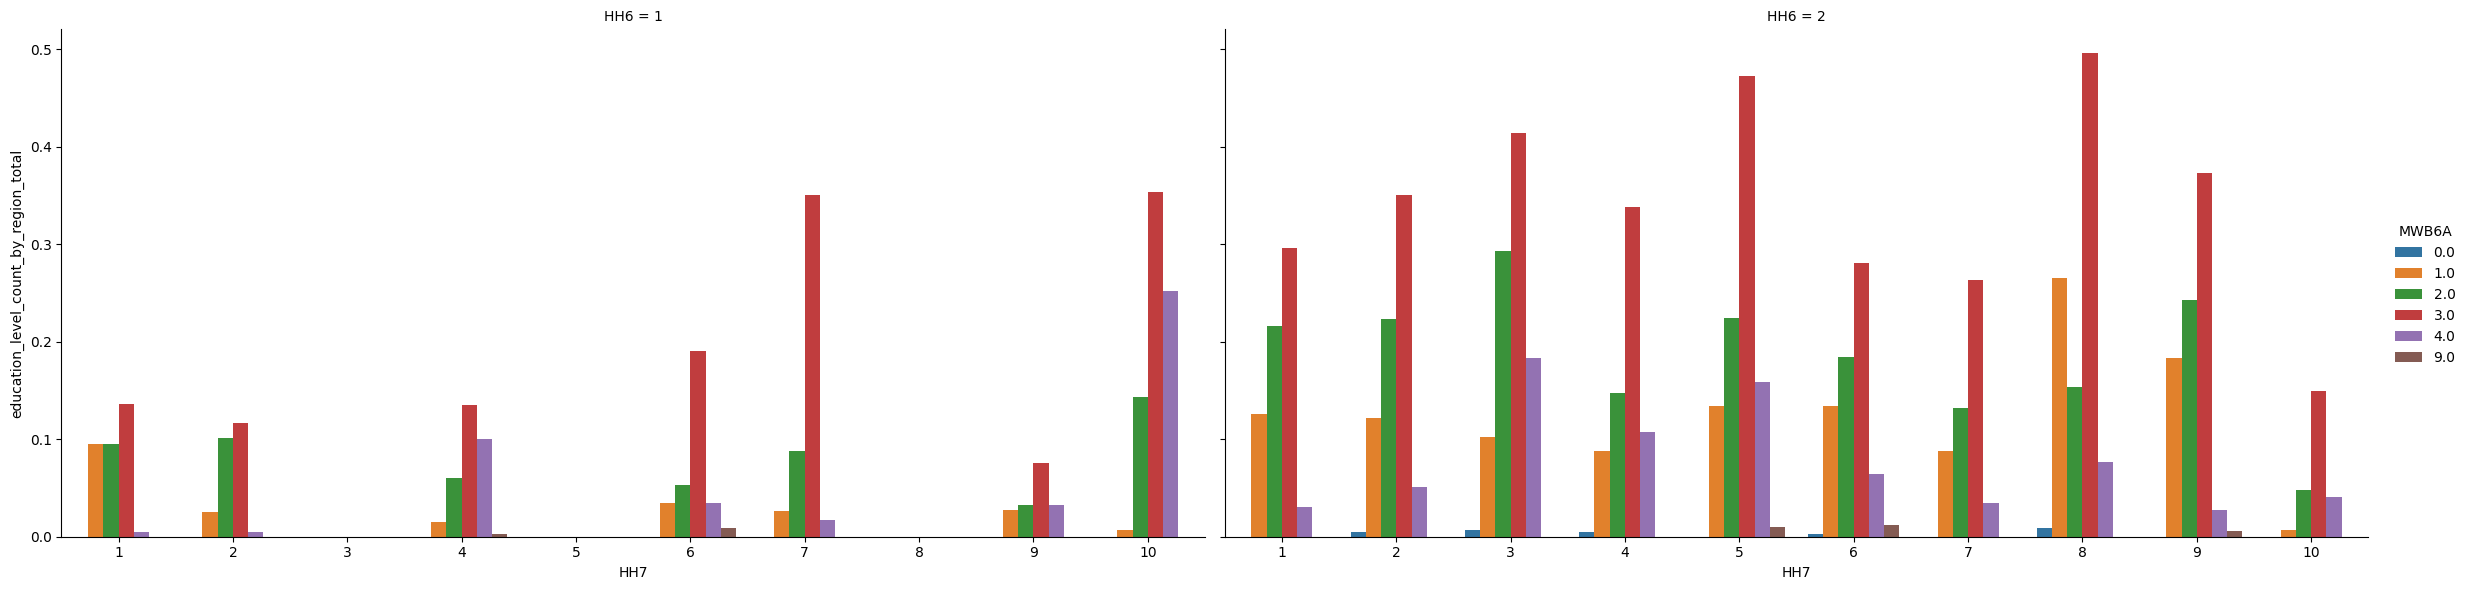

In [11]:
ax = sns.catplot(
    data=df_graph_1,
    x="HH7",
    y="education_level_count_by_region_total",
    hue="MWB6A",
    col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)

## Men highest level of school attended in rural area per region


In [12]:
rural_men = cleaned_highest_level_of_school_attended[
    cleaned_highest_level_of_school_attended["HH6"] == 2]
rural_respondents_per_region = rural_men[["HH7", "MWB6A"]].groupby(
    by="HH7").count()
rural_respondents_per_region.rename(
    columns={"MWB6A": "rural_respondents_count"}, inplace=True)
rural_respondents_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_rural_region_total(region_number):
    rural_region_total = rural_respondents_per_region[rural_respondents_per_region["HH7"]
                                                      == region_number]["rural_respondents_count"].values[0]
    return rural_region_total


df_rural_men = rural_men[["HH7", "MWB6A"]].groupby(by=["HH7", "MWB6A"])[
    "MWB6A"].count()
df_rural_men = pd.Series.to_frame(df_rural_men)
df_rural_men.rename(
    columns={"MWB6A": "rural_level_of_education_count"}, inplace=True)
df_rural_men.reset_index(inplace=True)
df_rural_men["rural_level_of_education_per_region"] = df_rural_men.apply(
    lambda x: x["rural_level_of_education_count"]/get_rural_region_total(x["HH7"]), axis=1)
df_rural_men

,HH7,MWB6A,rural_level_of_education_count,rural_level_of_education_per_region
0,1,1.0,25,0.187970
1,1,2.0,43,0.323308
2,1,3.0,59,0.443609
3,1,4.0,6,0.045113
4,2,0.0,1,0.006757
5,2,1.0,24,0.162162
6,2,2.0,44,0.297297
7,2,3.0,69,0.466216
8,2,4.0,10,0.067568
9,3,0.0,2,0.007326


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


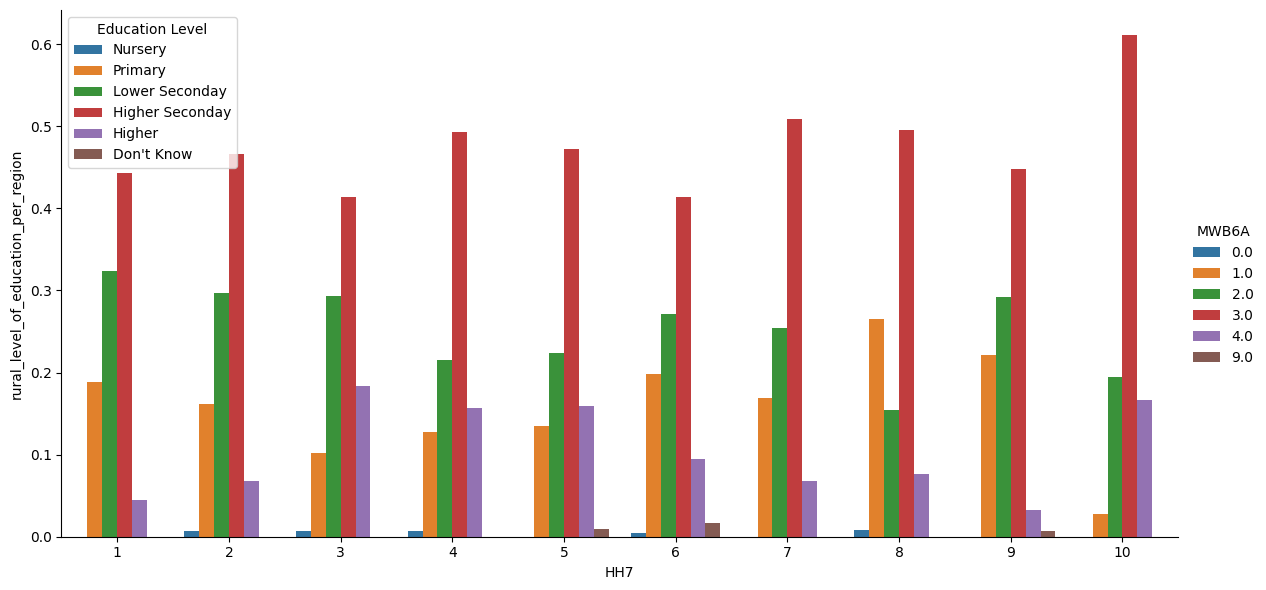

In [13]:
ax = sns.catplot(
    data=df_rural_men,
    x="HH7",
    y="rural_level_of_education_per_region",
    hue="MWB6A",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Nursery",
    "Primary",
    "Lower Seconday",
    "Higher Seconday",
    "Higher",
    "Don't Know"
])

In [14]:
urban_men = cleaned_highest_level_of_school_attended[
    cleaned_highest_level_of_school_attended["HH6"] == 1]
urban_respondents_per_region = urban_men[["HH7", "MWB6A"]].groupby(
    by="HH7").count()
urban_respondents_per_region.rename(
    columns={"MWB6A": "urban_respondents_count"}, inplace=True)
urban_respondents_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_urban_region_total(region_number):
    urban_region_total = urban_respondents_per_region[urban_respondents_per_region["HH7"]
                                                      == region_number]["urban_respondents_count"].values[0]
    return urban_region_total


df_urban_men = urban_men[["HH7", "MWB6A"]].groupby(by=["HH7", "MWB6A"])[
    "MWB6A"].count()
df_urban_men = pd.Series.to_frame(df_urban_men)
df_urban_men.rename(
    columns={"MWB6A": "urban_level_of_education_count"}, inplace=True)
df_urban_men.reset_index(inplace=True)
df_urban_men["urban_level_of_education_per_region"] = df_urban_men.apply(
    lambda x: x["urban_level_of_education_count"]/get_urban_region_total(x["HH7"]), axis=1)
df_urban_men["urban_level_of_education_per_region_total"] = df_urban_men.apply(
    lambda x: get_urban_region_total(x["HH7"]), axis=1)
df_urban_men

,HH7,MWB6A,urban_level_of_education_count,urban_level_of_education_per_region,urban_level_of_education_per_region_total
0,1,1.0,19,0.287879,66
1,1,2.0,19,0.287879,66
2,1,3.0,27,0.409091,66
3,1,4.0,1,0.015152,66
4,2,1.0,5,0.102041,49
5,2,2.0,20,0.408163,49
6,2,3.0,23,0.469388,49
7,2,4.0,1,0.020408,49
8,4,1.0,6,0.048000,125
9,4,2.0,24,0.192000,125


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


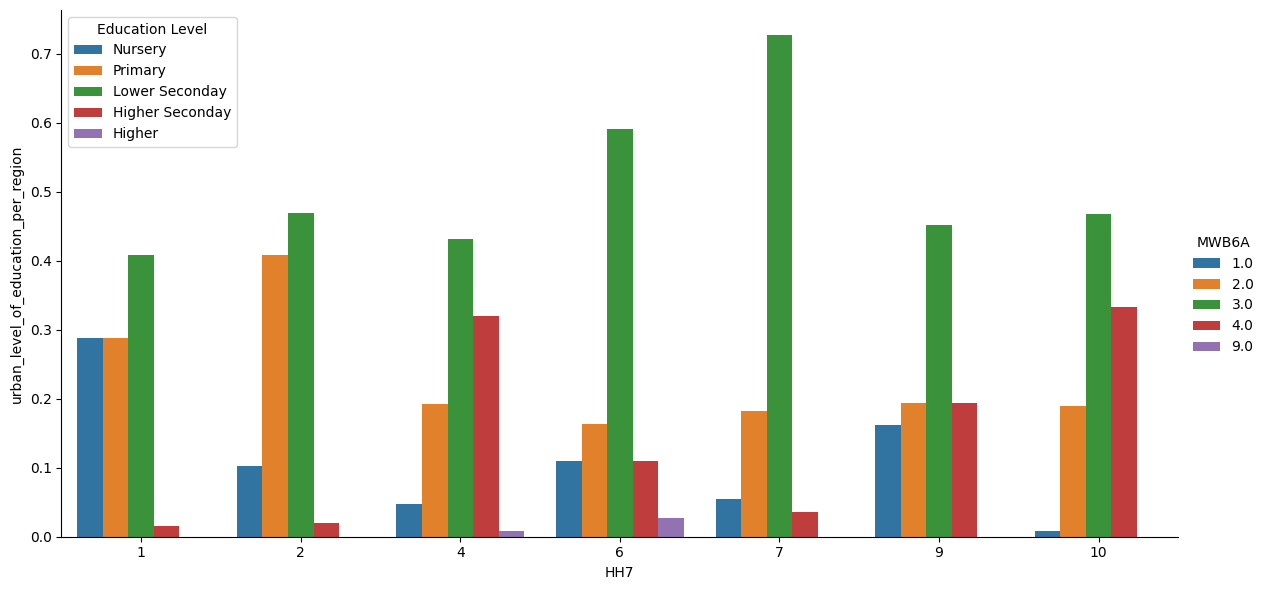

In [15]:
bx = sns.catplot(
    data=df_urban_men,
    x="HH7",
    y="urban_level_of_education_per_region",
    hue="MWB6A",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Nursery",
    "Primary",
    "Lower Seconday",
    "Higher Seconday",
    "Higher",
    "Don't Know"
])

## Men Highest Level of School attended per Region


In [23]:
m_el_urban_rural = df_urban_men[[
    "HH7", "MWB6A", "urban_level_of_education_per_region"]]
m_el_urban_rural.rename(
    columns={"urban_level_of_education_per_region": "level_of_education_per_region"}, inplace=True)
m_el_urban_rural["urban_rural"] = "urban"
m_el_urban_rural
t_df = df_rural_men[["HH7", "MWB6A", "rural_level_of_education_per_region"]]
t_df["urban_rural"] = "rural"
t_df.rename(
    columns={"rural_level_of_education_per_region": "level_of_education_per_region"}, inplace=True)
combined = pd.concat([m_el_urban_rural, t_df], ignore_index=True)

total_urban_men = urban_men["MWB6A"].size
urban_attended_nursery = urban_men[urban_men["MWB6A"]
                                   == 0.0]["MWB6A"].size/total_urban_men
urban_attended_primary = urban_men[urban_men["MWB6A"]
                                   == 1.0]["MWB6A"].size/total_urban_men

urban_attended_lower_sec = urban_men[urban_men["MWB6A"]
                                     == 2.0]["MWB6A"].size/total_urban_men
urban_attended_higher_sec = urban_men[urban_men["MWB6A"]
                                      == 3.0]["MWB6A"].size/total_urban_men
urban_attended_higher = urban_men[urban_men["MWB6A"]
                                  == 4.0]["MWB6A"].size/total_urban_men
urban_attended_dont_know = urban_men[urban_men["MWB6A"]
                                     == 9.0]["MWB6A"].size/total_urban_men

total_rural_men = rural_men["MWB6A"].size
rural_attended_nursery = rural_men[rural_men["MWB6A"]
                                   == 0.0]["MWB6A"].size/total_rural_men
rural_attended_primary = rural_men[rural_men["MWB6A"]
                                   == 1.0]["MWB6A"].size/total_rural_men

rural_attended_lower_sec = rural_men[rural_men["MWB6A"]
                                     == 2.0]["MWB6A"].size/total_rural_men
rural_attended_higher_sec = rural_men[rural_men["MWB6A"]
                                      == 3.0]["MWB6A"].size/total_rural_men
rural_attended_higher = rural_men[rural_men["MWB6A"]
                                  == 4.0]["MWB6A"].size/total_rural_men
rural_attended_dont_know = rural_men[rural_men["MWB6A"]
                                     == 9.0]["MWB6A"].size/total_rural_men


def set_education_level_name(level_number):
    if level_number == 0.0:
        return "Nursery"
    elif level_number == 1.0:
        return "Primary"
    elif level_number == 2.0:
        return "Lower Secondary"
    elif level_number == 3.0:
        return "Higher Secondary"
    elif level_number == 4.0:
        return "Higher"
    elif level_number == 9.0:
        return "Don't Know"


combined["MWB6A_name"] = combined.apply(
    lambda x: set_education_level_name(x["MWB6A"]), axis=1)

combined

/tmp/ipykernel_6311/1786116569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_el_urban_rural.rename(
/tmp/ipykernel_6311/1786116569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_el_urban_rural["urban_rural"] = "urban"


,HH7,MWB6A,level_of_education_per_region,urban_rural,MWB6A_name
0,1,1.0,0.287879,urban,Primary
1,1,2.0,0.287879,urban,Lower Secondary
2,1,3.0,0.409091,urban,Higher Secondary
3,1,4.0,0.015152,urban,Higher
4,2,1.0,0.102041,urban,Primary
...,...,...,...,...,...
73,9,9.0,0.006494,rural,Don't Know
74,10,1.0,0.027778,rural,Primary
75,10,2.0,0.194444,rural,Lower Secondary
76,10,3.0,0.611111,rural,Higher Secondary


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


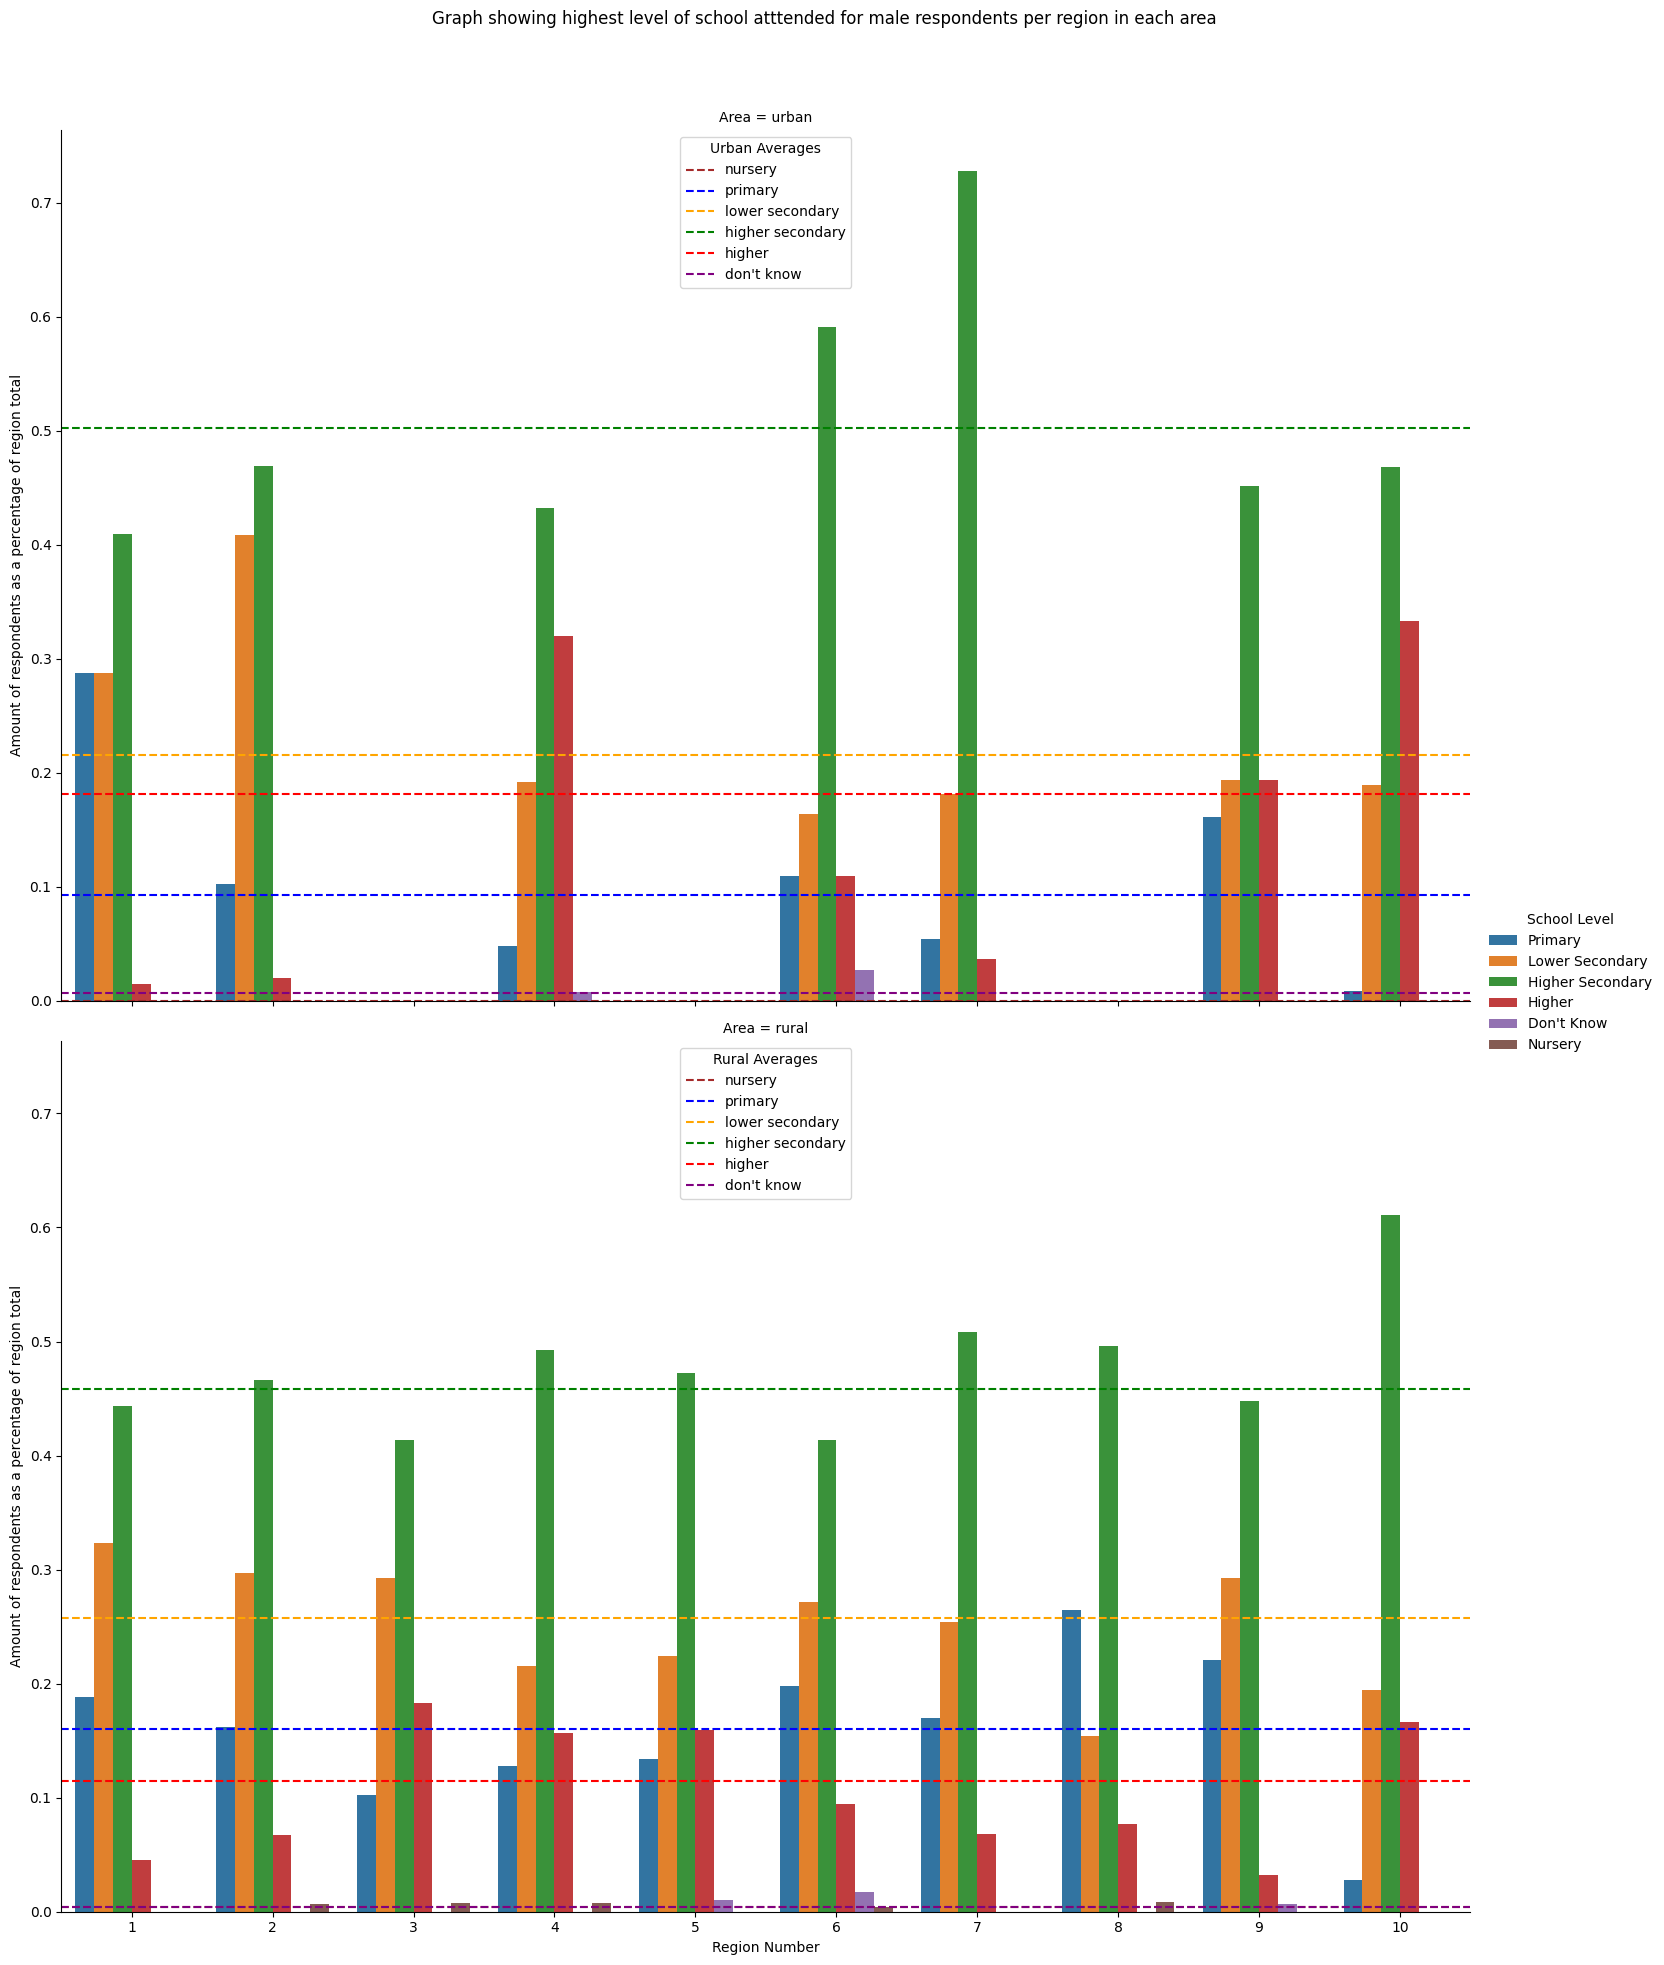

In [30]:
ex = sns.catplot(
    data=combined,
    x="HH7",
    y="level_of_education_per_region",
    hue="MWB6A_name",
    row="urban_rural",
    kind="bar",
    height=10,
    aspect=1.5,
    errorbar=None,
    legend=True,
    legend_out=True
)
urban_ex = ex.axes[0][0]
rural_ex = ex.axes[1][0]
ex.fig.subplots_adjust(top=0.92)
ex.set_axis_labels(
    "Region Number", "Amount of respondents as a percentage of region total")
ex.set_titles("Area = {row_name}")

ex.fig.suptitle(
    "Graph showing highest level of school atttended for male respondents per region in each area")

u1 = urban_ex.axhline(urban_attended_nursery, linestyle="dashed",
                      label="nursery", color="brown")
u2 = urban_ex.axhline(urban_attended_primary, linestyle="dashed", color="blue",
                      label="primary")
u3 = urban_ex.axhline(urban_attended_lower_sec, linestyle="dashed", color="orange",
                      label="lower secondary")
u4 = urban_ex.axhline(urban_attended_higher_sec, linestyle="dashed", color="green",
                      label="higher secondary")
u5 = urban_ex.axhline(urban_attended_higher, linestyle="dashed", color="red",
                      label="higher")
u6 = urban_ex.axhline(urban_attended_dont_know, linestyle="dashed", color="purple",
                      label="don't know")

r1 = rural_ex.axhline(rural_attended_nursery, linestyle="dashed",
                      label="nursery", color="brown")
r2 = rural_ex.axhline(rural_attended_primary, linestyle="dashed", color="blue",
                      label="primary")
r3 = rural_ex.axhline(rural_attended_lower_sec, linestyle="dashed", color="orange",
                      label="lower secondary")
r4 = rural_ex.axhline(rural_attended_higher_sec, linestyle="dashed", color="green",
                      label="higher secondary")
r5 = rural_ex.axhline(rural_attended_higher, linestyle="dashed", color="red",
                      label="higher")
r6 = rural_ex.axhline(rural_attended_dont_know, linestyle="dashed", color="purple",
                      label="don't know")

urban_ex.legend(handles=[u1, u2, u3, u4, u5, u6],
                title="Urban Averages", loc="upper center")
rural_ex.legend(handles=[r1, r2, r3, r4, r5, r6],
                title="Rural Averages", loc="upper center")

ex.legend.set_title("School Level")

In [28]:
urban_averages = [
    urban_attended_nursery,
    urban_attended_primary,
    urban_attended_lower_sec,
    urban_attended_higher_sec,
    urban_attended_higher,
    urban_attended_dont_know,
]

rural_averages = [
    rural_attended_nursery,
    rural_attended_primary,
    rural_attended_lower_sec,
    rural_attended_higher_sec,
    rural_attended_higher,
    rural_attended_dont_know,
]
men_averages = pd.DataFrame()
men_averages["urban_men_averages"] = urban_averages
men_averages["rural_men_averages"] = rural_averages
men_averages.rename(index={0: "nursery", 1: "primary", 2: "lower secondary",
                           3: "higher secondary", 4: "higher", 5: "don't know"}, inplace=True)
men_averages

,urban_men_averages,rural_men_averages
nursery,0.000000,0.004302
primary,0.093236,0.160418
lower secondary,0.215722,0.257529
higher secondary,0.502742,0.458513
higher,0.180987,0.114935
don't know,0.007313,0.004302


In [27]:
combined.to_csv("men_highest_school_level_attended_combined.csv")
men_averages.to_csv("men_highest_school_level_attended_averages.csv")

## Men Education level


In [16]:
m_education_level = m_extract[["HH7", "HH6", "mwelevel"]]
m_education_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HH7       2916 non-null   int64  
 1   HH6       2916 non-null   int64  
 2   mwelevel  2214 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 68.5 KB


In [17]:
cleaned_m_education_level = m_education_level[m_education_level["mwelevel"].notnull(
)]

In [18]:
urban_men_el = cleaned_m_education_level[
    cleaned_m_education_level["HH6"] == 1]
urban_respondents_el_per_region = urban_men_el[["HH7", "mwelevel"]].groupby(
    by="HH7").count()
urban_respondents_el_per_region.rename(
    columns={"mwelevel": "urban_respondents_count"}, inplace=True)
urban_respondents_el_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_urban_region_total_el(region_number):
    urban_region_total = urban_respondents_el_per_region[urban_respondents_el_per_region["HH7"]
                                                         == region_number]["urban_respondents_count"].values[0]
    return urban_region_total


df_urban_men_el = urban_men_el[["HH7", "mwelevel"]].groupby(by=["HH7", "mwelevel"])[
    "mwelevel"].count()
df_urban_men_el = pd.Series.to_frame(df_urban_men_el)
df_urban_men_el.rename(
    columns={"mwelevel": "urban_level_of_education_count"}, inplace=True)
df_urban_men_el.reset_index(inplace=True)
df_urban_men_el["urban_level_of_education_per_region"] = df_urban_men_el.apply(
    lambda x: x["urban_level_of_education_count"]/get_urban_region_total_el(x["HH7"]), axis=1)
# df_urban_men_el["urban_level_of_education_per_region"] = df_urban_women_el.apply(
#    lambda x: get_urban_region_total_el(x["HH7"]), axis=1)
df_urban_men_el

,HH7,mwelevel,urban_level_of_education_count,urban_level_of_education_per_region
0,1,0.0,2,0.029412
1,1,1.0,19,0.279412
2,1,2.0,46,0.676471
3,1,3.0,1,0.014706
4,2,1.0,5,0.102041
5,2,2.0,43,0.877551
6,2,3.0,1,0.020408
7,4,1.0,6,0.048000
8,4,2.0,78,0.624000
9,4,3.0,40,0.320000


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


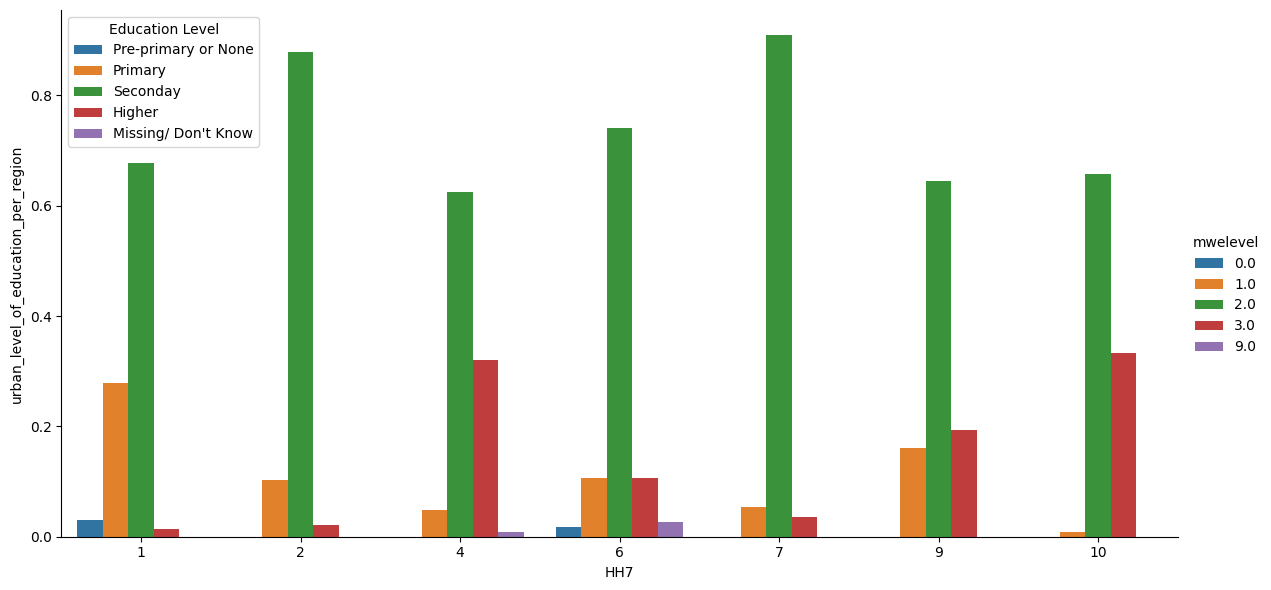

In [19]:
dx = sns.catplot(
    data=df_urban_men_el,
    x="HH7",
    y="urban_level_of_education_per_region",
    hue="mwelevel",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Pre-primary or None",
    "Primary",
    "Seconday",
    "Higher",
    "Missing/ Don't Know"
])

In [20]:
rural_men_el = cleaned_m_education_level[
    cleaned_m_education_level["HH6"] == 2]
rural_respondents_el_per_region = rural_men_el[["HH7", "mwelevel"]].groupby(
    by="HH7").count()
rural_respondents_el_per_region.rename(
    columns={"mwelevel": "rural_respondents_count"}, inplace=True)
rural_respondents_el_per_region.reset_index(inplace=True)

# each education level in each region by percentage of total respondents in the region


def get_rural_region_total_el(region_number):
    rural_region_total = rural_respondents_el_per_region[rural_respondents_el_per_region["HH7"]
                                                         == region_number]["rural_respondents_count"].values[0]
    return rural_region_total


df_rural_men_el = rural_men_el[["HH7", "mwelevel"]].groupby(by=["HH7", "mwelevel"])[
    "mwelevel"].count()
df_rural_men_el = pd.Series.to_frame(df_rural_men_el)
df_rural_men_el.rename(
    columns={"mwelevel": "rural_level_of_education_count"}, inplace=True)
df_rural_men_el.reset_index(inplace=True)
df_rural_men_el["rural_level_of_education_per_region"] = df_rural_men_el.apply(
    lambda x: x["rural_level_of_education_count"]/get_rural_region_total_el(x["HH7"]), axis=1)
# df_rural_men_el["rural_level_of_education_per_region"] = df_rural_women_el.apply(
#    lambda x: get_rural_region_total_el(x["HH7"]), axis=1)
df_rural_men_el

,HH7,mwelevel,rural_level_of_education_count,rural_level_of_education_per_region
0,1,0.0,7,0.050000
1,1,1.0,25,0.178571
2,1,2.0,102,0.728571
3,1,3.0,6,0.042857
4,2,0.0,5,0.032895
5,2,1.0,24,0.157895
6,2,2.0,113,0.743421
7,2,3.0,10,0.065789
8,3,0.0,5,0.018116
9,3,1.0,28,0.101449


/home/kerboros/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


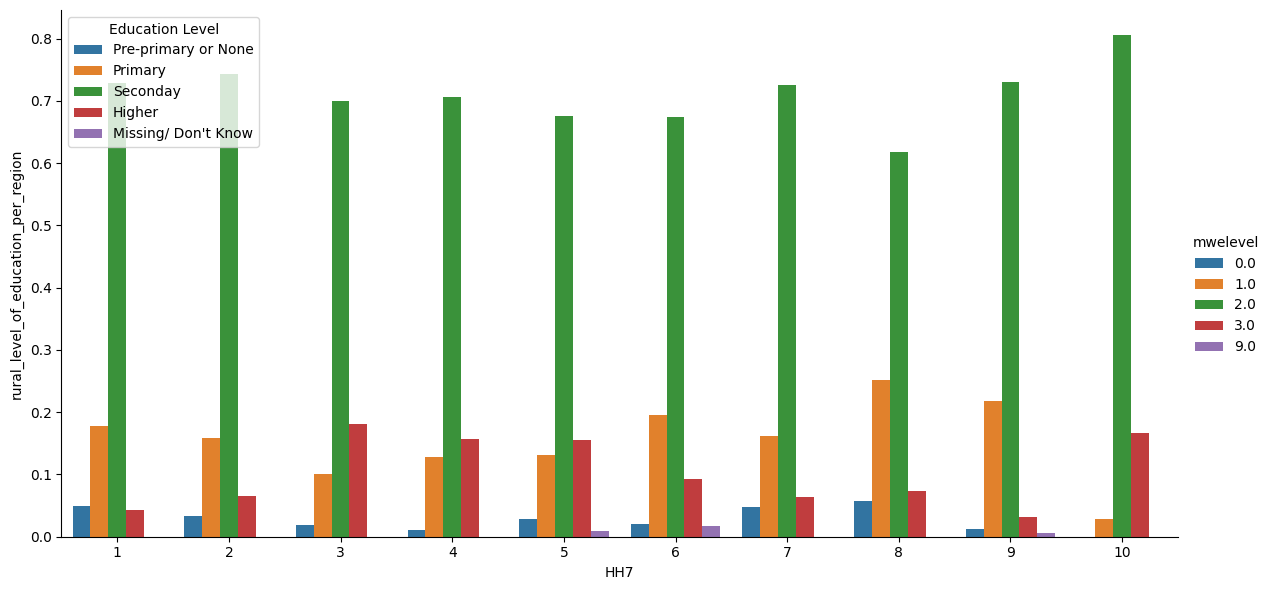

In [22]:
dx = sns.catplot(
    data=df_rural_men_el,
    x="HH7",
    y="rural_level_of_education_per_region",
    hue="mwelevel",
    # col="HH6",
    kind="bar",
    height=6,
    aspect=2,
    errorbar=None
)
plt.legend(loc='upper left', title="Education Level", labels=[
    #    "Pre-primary or none repondents average",
    #    "Primary repondents average",
    #    "Seconday repondents average",
    #    "Higher repondents average",
    "Pre-primary or None",
    "Primary",
    "Seconday",
    "Higher",
    "Missing/ Don't Know"
])